In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

from https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1

In [16]:
overdoses = pd.read_excel('overdose_data_1999-2015.xls',sheet_name='Online',skiprows =6)

In [17]:
overdoses.shape

(53, 19)

In [4]:
overdoses.head(10)

,Unnamed: 0,Unnamed: 1,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,NaN,Total Overdose Deaths,16849.0,17415.0,19394.0,23518.0,25785.0,27424.0,29813.0,34425.0,36010.0,36450.0,37004.0,38329.0,41340.0,41502.0,43982.0,47055.0,52404.0
1,NaN,Female,5591.0,5852.0,6736.0,8490.0,9386.0,10304.0,11089.0,12532.0,13712.0,13982.0,14411.0,15323.0,16352.0,16390.0,17183.0,18243.0,19447.0
2,NaN,Male,11258.0,11563.0,12658.0,15028.0,16399.0,17120.0,18724.0,21893.0,22298.0,22468.0,22593.0,23006.0,24988.0,25112.0,26799.0,28812.0,32957.0
3,NaN,Prescription Drugs1,7523.0,7885.0,9197.0,11529.0,12640.0,14153.0,15352.0,18559.0,19601.0,20044.0,20848.0,22134.0,22810.0,22114.0,22767.0,25760.0,29728.0
4,NaN,Female,3011.0,3196.0,3790.0,4765.0,5191.0,5980.0,6351.0,7553.0,8251.0,8275.0,8740.0,9292.0,9771.0,9632.0,10019.0,11181.0,12218.0
5,NaN,Male,4512.0,4689.0,5407.0,6764.0,7449.0,8173.0,9001.0,11006.0,11350.0,11769.0,12108.0,12842.0,13039.0,12482.0,12748.0,14579.0,17510.0
6,NaN,Opioid Pain Relievers2,4030.0,4400.0,5528.0,7456.0,8517.0,9857.0,10928.0,13723.0,14408.0,14800.0,15597.0,16651.0,16917.0,16007.0,16235.0,18893.0,22598.0
7,NaN,Female,1287.0,1534.0,1969.0,2761.0,3173.0,3758.0,4188.0,5058.0,5630.0,5733.0,6213.0,6631.0,6903.0,6745.0,6992.0,7924.0,8786.0
8,NaN,Male,2743.0,2866.0,3559.0,4695.0,5344.0,6099.0,6740.0,8665.0,8778.0,9067.0,9384.0,10020.0,10014.0,9262.0,9243.0,10969.0,13812.0
9,NaN,Benzodiazepines3,1135.0,1298.0,1594.0,2022.0,2248.0,2627.0,3084.0,3835.0,4500.0,5010.0,5567.0,6497.0,6872.0,6524.0,6973.0,7945.0,8791.0


In [18]:
def get_data(table,rownum,title):
    data = pd.DataFrame(table.loc[rownum][2:]).astype(float)
    data.columns = {title}
    return data

In [19]:
# Set title
title = 'Heroin Overdoses'
# Grab one line
d = get_data(overdoses,18,title)

In [20]:
x = np.array(d.index)
y = np.array(d['Heroin Overdoses'])
#
overdose = pd.DataFrame(y,x)
overdose.columns = {title}


In [21]:
def animate(i):
    """
    This will animate the overdose dataframe
    """
    data = overdose.iloc[:int(i+1)] #select data range
    p = sns.lineplot(x=data.index, y=data[title], data=data, color="r")
    p.tick_params(labelsize=17)
    plt.setp(p.lines,linewidth=7)

In [22]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='A. Snuffleupagus, esq.'), bitrate=1800)

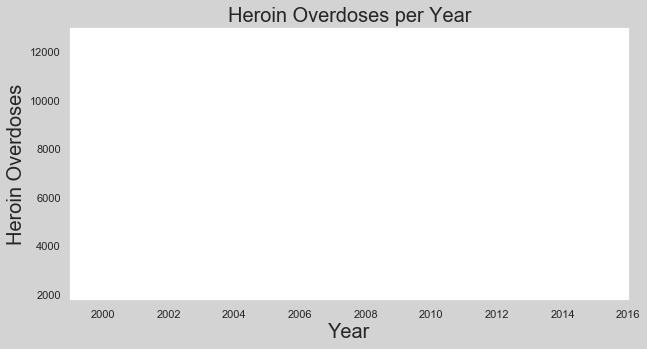

In [23]:
# Create the figure
fig = plt.figure(figsize=(10,5))
plt.xlim(1999, 2016)
plt.ylim(np.min(overdose)[0], np.max(overdose)[0])
plt.xlabel('Year',fontsize=20)
plt.ylabel(title,fontsize=20)
plt.title('Heroin Overdoses per Year',fontsize=20)
# set seaborn prettiness
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'lightgrey','figure.edgecolor':'black','axes.grid':True})

In [24]:
# Build the animation and display
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=17, repeat=True)
plt.show()

### An update to smooth the lines

In [12]:
# Line smoother addition
def augment(xold,yold,numsteps):
    xnew = []
    ynew = []
    for i in range(len(xold)-1):
        difX = xold[i+1]-xold[i]
        stepsX = difX/numsteps
        difY = yold[i+1]-yold[i]
        stepsY = difY/numsteps
        for s in range(numsteps):
            xnew = np.append(xnew,xold[i]+s*stepsX)
            ynew = np.append(ynew,yold[i]+s*stepsY)
    return xnew,ynew

In [13]:
# # Add smoothing augmentation
# XN,YN = augment(x,y,10)
# augmented = pd.DataFrame(YN,XN)
# augmented.columns = {title}

# def animateAugmented(i):
#     """
#     This will animate the augmented (line smoothed) dataframe
#     """
#     data = augmented.iloc[:int(i+1)] #select data range
#     p = sns.lineplot(x=data.index, y=data[title], data=data, color="r")
#     p.tick_params(labelsize=17)
#     plt.setp(p.lines,linewidth=7)
# fig = plt.figure(figsize=(10,5))
# plt.xlim(1999, 2016)
# plt.ylim(np.min(augmented)[0], np.max(augmented)[0])
# plt.xlabel('Year',fontsize=20)
# plt.ylabel(title,fontsize=20)
# plt.title('Heroin Overdoses per Year',fontsize=20)
# aniaug = matplotlib.animation.FuncAnimation(fig, animateAugmented, frames=17, repeat=True)
# plt.show()

In [14]:
# Save animation locally
#ani.save('HeroinOverdosesJumpy.mp4', writer=writer)